鸢尾花数据的属性：
1.萼片长度（单位cm)
2.萼片宽度（单位cm)
3.花瓣长度（单位cm）
4.花瓣宽度（单位cm）
5.分类：Iris-Setosa、Iris-Versicolour、Iris-Virginica（三种鸢尾花类型）

In [28]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
#对分类进行处理
def iris_type(s):
    it = {b'Iris-setosa':0,b'Iris-versicolor':1,b'Iris-virginica':2}
    return it[s]

In [10]:
#读入数据
path = u'D:/Desktop/iris.data'#数据文件路径
data = np.loadtxt(path,dtype=float,delimiter=',',converters={4:iris_type})

In [14]:
x,y =np.split(data,(4,),axis=1)#对数据进行拆分处理
x = x[:,:2]#选取前两列进行分析
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=0.8)#2-8分类原则
clf = svm.SVC(C=0.8,kernel='rbf',gamma=20,decision_function_shape='ovr')#SVM操作
clf.fit(x_train,y_train.ravel())#拟合
print(clf.score(x_train,y_train))#训练数据精度
print(clf.score(x_test,y_test))#测试数据精度

0.8583333333333333
0.8333333333333334


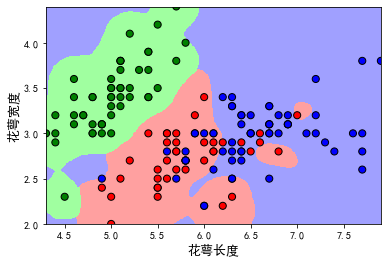

In [33]:
x1_min,x1_max=x[:,0].min(),x[:,0].max()#第0列的范围，最小值或最大值
x2_min,x2_max=x[:,1].min(),x[:,1].max()#第1列的范围，最小值或最大值
x1,x2 = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))
grid_test=np.stack((x1.flat,x2.flat),axis=1)#测试点
grid_hat=clf.predict(grid_test)#对测试点进行预测
mpl.rcParams['font.sans-serif']=[u'SimHei']#绘图字体设置
mpl.rcParams['axes.unicode_minus']=False
cm_light=mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
cm_dark=mpl.colors.ListedColormap(['g','r','b'])
plt.pcolormesh(x1,x2,grid_hat.reshape(x1.shape),shading='auto',cmap=cm_light)
plt.scatter(x[:,0],x[:,1],c=y.reshape(x[:,0].shape),edgecolors='k',s=50,cmap=cm_dark)
plt.scatter(x_test[:,0],x_test[:,1],s=120,facecolors='none',zorder=10)
plt.xlabel(u'花萼长度',fontsize=13)
plt.ylabel(u'花萼宽度',fontsize=13)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.show()

In [40]:
x,y =np.split(data,(4,),axis=1)#对数据进行拆分处理
x = x[:,[2,3]]#选取后两列进行分析
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=0.8)#2-8分类原则
clf = svm.SVC(C=0.8,kernel='rbf',gamma=20,decision_function_shape='ovr')#SVM操作
clf.fit(x_train,y_train.ravel())#拟合
print(clf.score(x_train,y_train))#训练数据精度
print(clf.score(x_test,y_test))#测试数据精度

0.975
0.9333333333333333


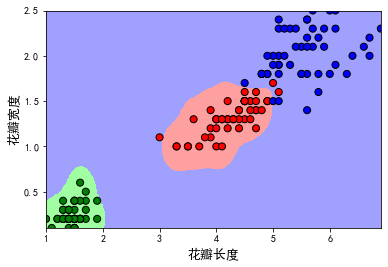

In [41]:
x1_min,x1_max=x[:,0].min(),x[:,0].max()
x2_min,x2_max=x[:,1].min(),x[:,1].max()
x1,x2 = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))
grid_test=np.stack((x1.flat,x2.flat),axis=1)
grid_hat=clf.predict(grid_test)
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False
cm_light=mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
cm_dark=mpl.colors.ListedColormap(['g','r','b'])
plt.pcolormesh(x1,x2,grid_hat.reshape(x1.shape),shading='auto',cmap=cm_light)
plt.scatter(x[:,0],x[:,1],c=y.reshape(x[:,0].shape),edgecolors='k',s=50,cmap=cm_dark)
plt.scatter(x_test[:,0],x_test[:,1],s=120,facecolors='none',zorder=10)
plt.xlabel(u'花瓣长度',fontsize=13)
plt.ylabel(u'花瓣宽度',fontsize=13)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.show()